<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

### Objective

The aim is to classify iris flowers among three species from measurements of sepals and petals' length and width.The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.The central goal here is to design a model that makes useful classifications for new flowers or, in other words, one which exhibits good generalization.

In [1]:
import numpy as np
import pandas as pd

In [2]:
columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
df = pd.read_csv('iris_data.csv',names=columns)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,7.6,3.0,6.6,2.1,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
112,6.8,3.0,5.5,2.1,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

## Exploratory Data Analysis

Histogram of petal length

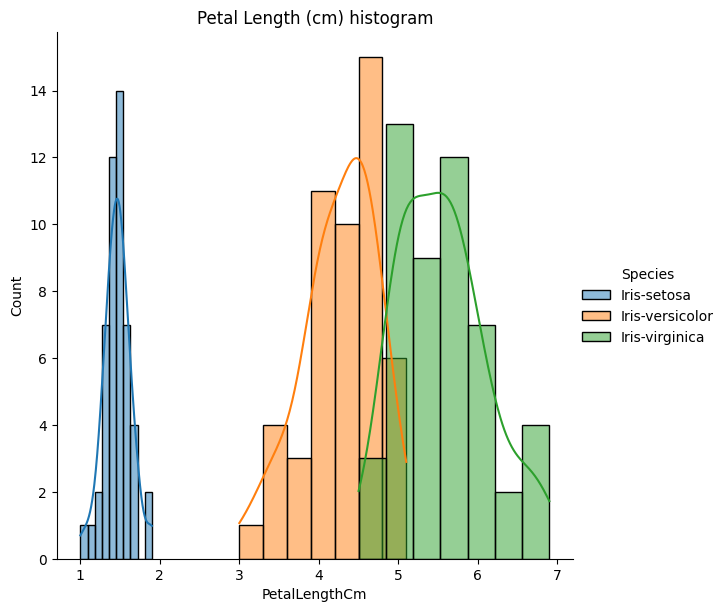

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.FacetGrid(df, hue="Species",height=6,aspect=1) \
  .map(sns.histplot,"PetalLengthCm",kde=True) \
  .add_legend()
plt.title('Petal Length (cm) histogram')
plt.show()

* **Iris-setosa is Distinctly Different:** Setosa stands out with much shorter petals (1-2 cm) and forms a completely separate cluster from the other two species. This makes it easily distinguishable.
* **Versicolor vs. Virginica Differentiation:** While these two species overlap more than either does with setosa, they still show distinguishable patterns. Versicolor tends to peak around 4-4.5 cm, while virginica has a broader distribution extending to longer lengths (up to 7 cm) with peaks around 5-5.5 cm.
* All three species show a normal distribution.

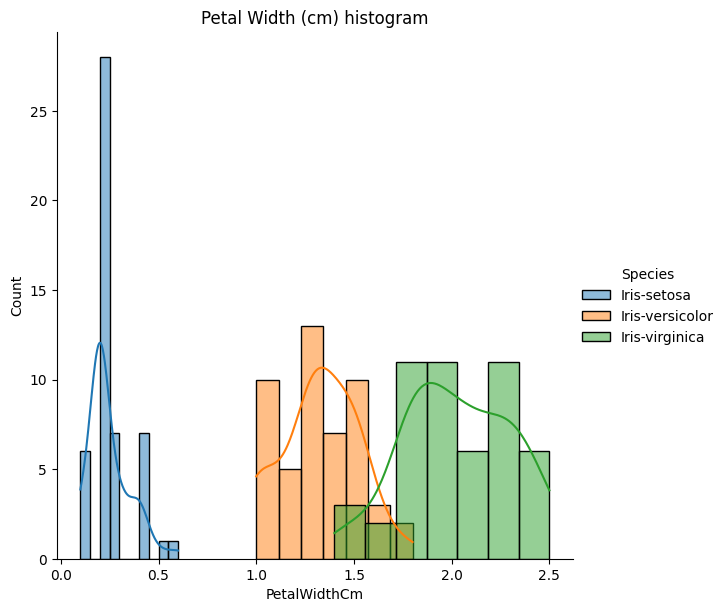

In [28]:
# Let's try visualizing a distribution plot for Petal Width now
g = sns.FacetGrid(data=df,hue="Species",height=6,aspect=1)
g.map(sns.histplot,"PetalWidthCm",kde=True) \
.add_legend()
plt.title('Petal Width (cm) histogram')
plt.show()

* **Iris-setosa is right skewed:** As shown from the histogram plot, we can infer that the setosa species is distinctly different ranging from 0.1 to 0.5. Particularly 0.25 has a count of more than 25 values.
* **Versicolor vs Virginica:** While these two species do overlap, they still show distinguishable patterns. The petal width for versicolor ranges from 1 to 1.75 cm and for virginica it ranges from 1.5 to 2.5 cm.

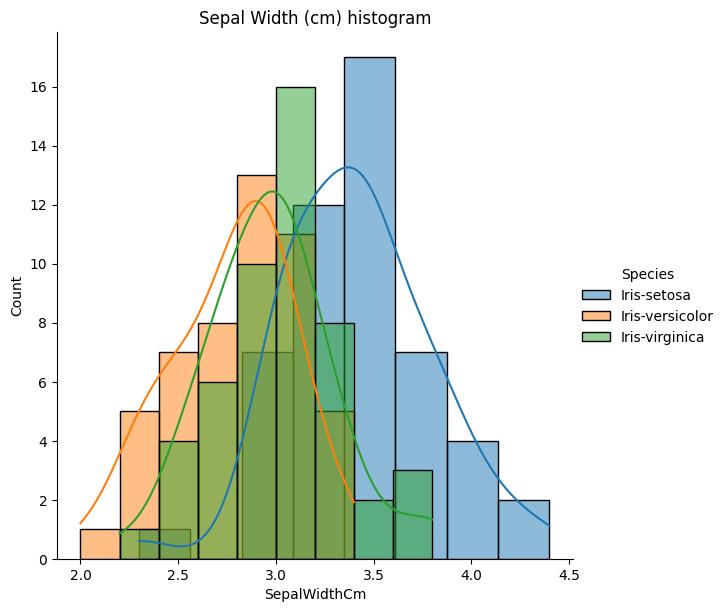

In [29]:
# Let's take SepalWidthCm and visualize it
g = sns.FacetGrid(data=df,hue="Species",height = 6,aspect = 1)
g.map(sns.histplot, "SepalWidthCm",kde=True) \
.add_legend()
plt.title('Sepal Width (cm) histogram')
plt.show();

* Sepal width shows significant overlap between all three species. The distributions span roughly 2.0-4.2 cm with substantial areas where species boundaries blur, making sepal width a less reliable standalone classifier.
* Iris-setosa (blue) shows the widest sepals, peaking around 3.4-3.6 cm. Iris-versicolor (orange) has the narrowest sepals with a peak around 2.7-2.8 cm, while Iris-virginica (green) falls between them, peaking around 3.0-3.1 cm.

### 2D Plotting

* Scatter plot between Sepal length and Sepal Width
* The above plot with the hue as species
* Pairplot of the entire dataframe
* Heatmap of the correlation

### **Sepal Width vs Length**



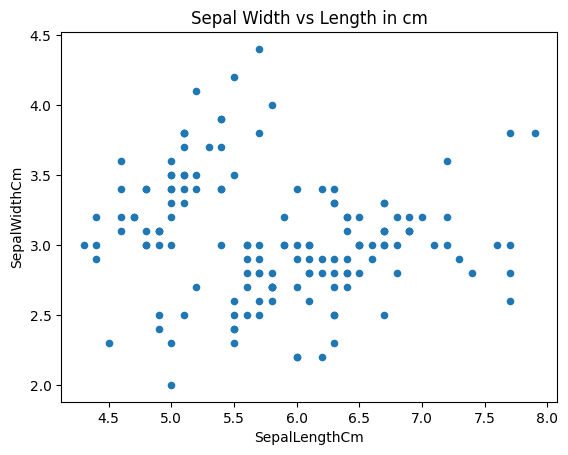

In [32]:
df.plot(kind='scatter', x = "SepalLengthCm",y="SepalWidthCm")
plt.title("Sepal Width vs Length in cm")
plt.show();

There is a positive correlation between width and length. The linear relationship indicates biological constraints - flowers can't have extremely long, narrow sepals or very short, wide ones. This suggests developmental coordination between sepal dimensions.

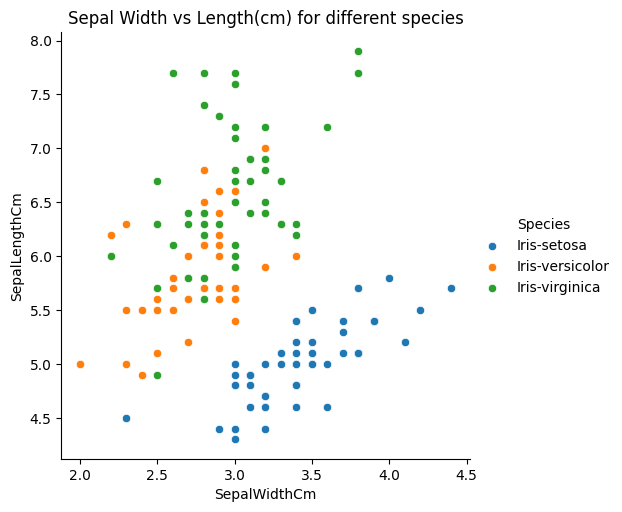

In [35]:
# Taking hue into account
g = sns.FacetGrid(data=df,hue="Species",height=5,aspect=1)
g.map(sns.scatterplot,"SepalWidthCm","SepalLengthCm") \
.add_legend()
plt.title("Sepal Width vs Length(cm) for different species")
plt.show();

* **Clear Linear Relationships:** Each species shows its own positive correlation between sepal length and width, but with different slopes and intercepts.
* The three species show individual clusters - the setosa species has it's own cluster to the bottom. While the versicolor and virginica have some overlap, they have their own cluster centers.

### Pairplot of the entire dataframe

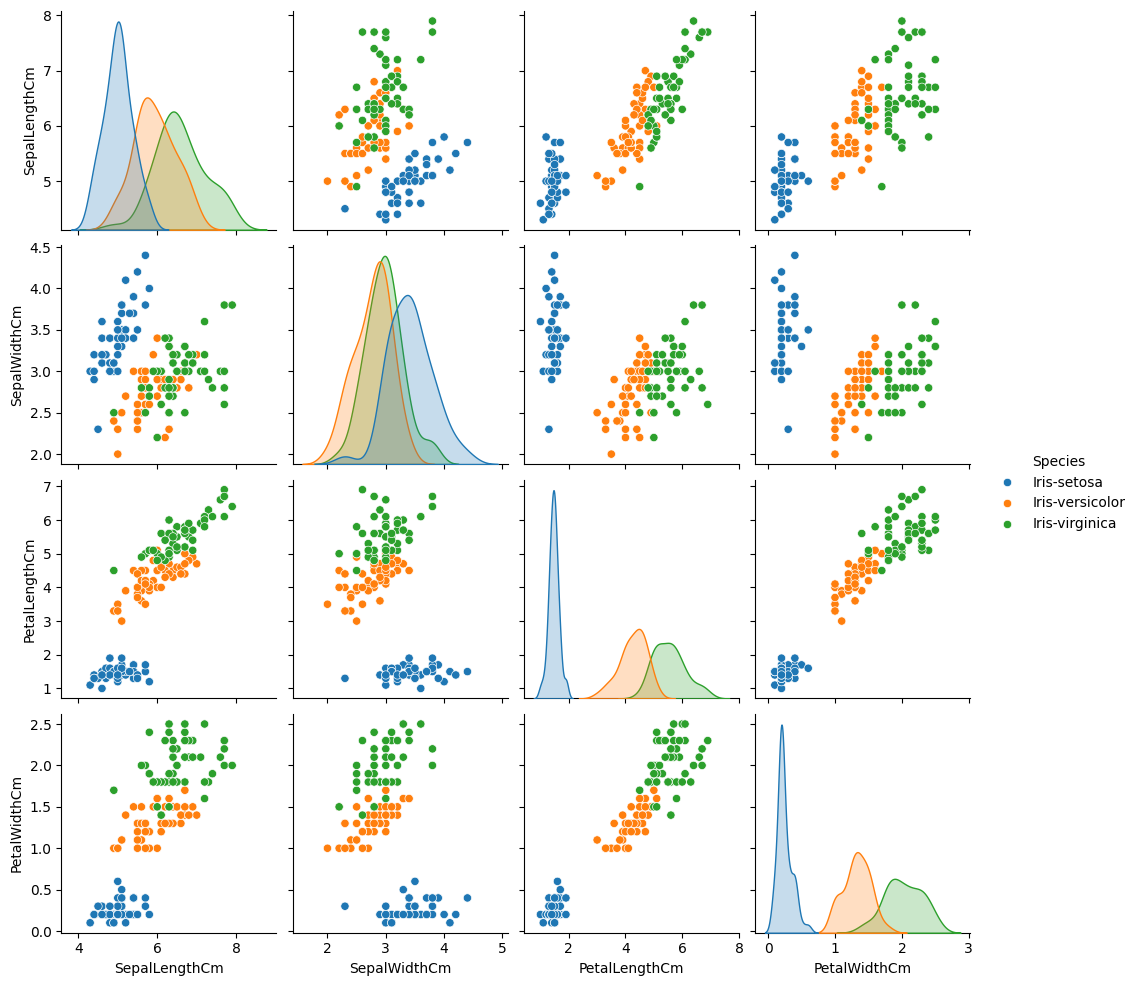

In [36]:
sns.pairplot(df,hue="Species");

In [44]:
corr_df = df[[col for col in df.columns if col != 'Species']].corr()

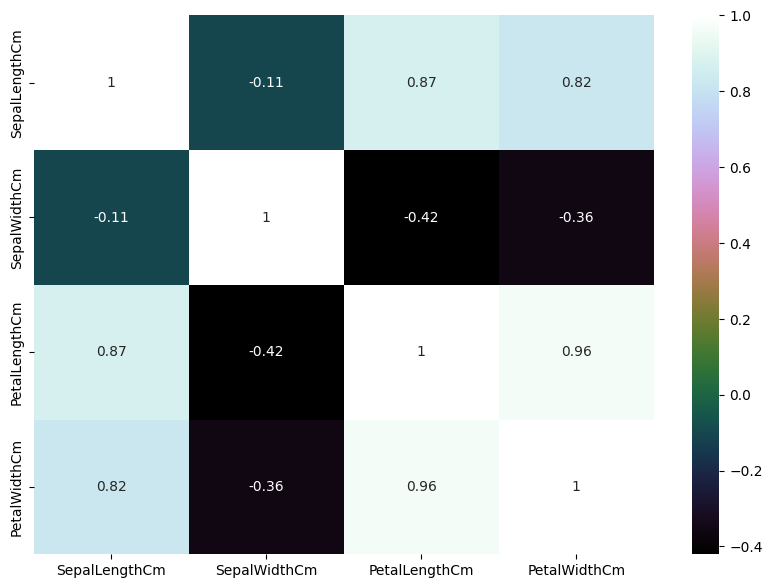

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_df,annot=True,cmap="cubehelix")
plt.show();

**Strong Positive Correlations:**

* Petal dimensions: 0.96 correlation - petal length and width are highly coordinated
* Sepal length with petals: 0.87 (length) and 0.82 (width) - sepals scale with petal size

**Negative Correlations:**

* Sepal width is anti-correlated with petal dimensions (-0.42 and -0.36) - wider sepals associate with smaller petals
* Sepal dimensions weakly negatively correlated (-0.11) - longer sepals tend to be slightly narrower

## Data Preprocessing

In [37]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50
